# Gekachelte Bilddateiformate: zarr

Bei der Arbeit mit großen Bilddaten werden häufig spezielle Dateiformate wie das [zarr](https://zarr.readthedocs.io/en/stable/) Format verwendet. Zarr speichert Bilddaten in Chunks. Anstatt einen riesigen Bilddatensatz von der Festplatte zu laden und dann zu kacheln, ist es möglich, einzelne zarr-Kacheln zu laden, zu verarbeiten und das Ergebnis wieder auf die Festplatte zu speichern. Auf diese Weise kann man große Bilder verarbeiten, ohne jemals das große Bild in den Speicher zu laden. 

Die Verwendung dieser Formate bringt zusätzliche Herausforderungen mit sich, zum Beispiel muss das erneute Speichern des großen Bildes in kleine zarr-basierte Kacheln auf einem Computer erfolgen, der in der Lage ist, das große Bild überhaupt zu öffnen. Dieses Notebook zeigt, wie man dies in einem etwas unrealistischen Szenario macht: Wir laden den Datensatz zuerst, um ihn als Kacheln neu zu speichern, und am Ende laden wir diese Kacheln von der Festplatte und visualisieren sie. In einem realistischen Szenario wären diese beiden Schritte nicht möglich. Je nach Szenario müssen diese beiden Schritte improvisiert werden.

Siehe auch
* [Genevieve Buckleys Gist: save_as_zarr.ipynb](https://gist.github.com/GenevieveBuckley/d94351adcc61cb5237a6c0a540c14cf6)
* [dask.array.from_zarr](https://docs.dask.org/en/stable/generated/dask.array.from_zarr.html#dask.array.from_zarr)


In [1]:
import zarr
import dask.array as da
import numpy as np
from skimage.io import imread, imshow
from numcodecs import Blosc

Zu Demonstrationszwecken verwenden wir einen Datensatz, der von Theresa Suckert, OncoRay, Universitätsklinikum Carl Gustav Carus, TU Dresden, zur Verfügung gestellt wurde. Der Datensatz ist unter der [Lizenz: CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) lizenziert. Wir verwenden hier eine beschnittene Version, die als 8-Bit-Bild neu gespeichert wurde, um sie mit dem Notebook bereitstellen zu können. Das vollständige 16-Bit-Bild im CZI-Dateiformat finden Sie [online](https://zenodo.org/record/4276076#.YX1F-55BxaQ).

In [2]:
image = imread('../../data/P1_H_C3H_M004_17-cropped.tif')[1]

# Zu Testzwecken beschneiden wir das Bild noch weiter.
# Kommentieren Sie die folgende Zeile aus, um auf den gesamten 5000x2000 Pixeln zu arbeiten
image = image[1000:1500, 1000:1500]

image.shape

(500, 500)

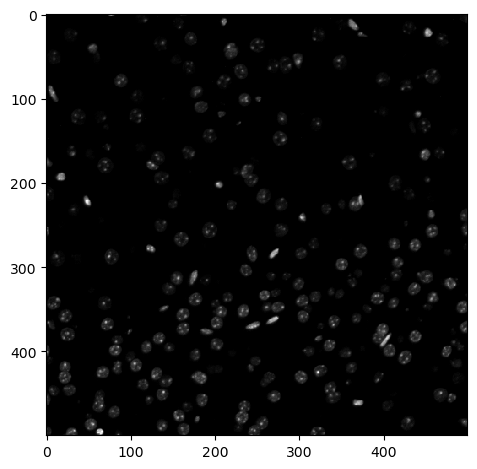

In [3]:
imshow(image)

## Als zarr speichern
Wir werden jetzt unser großes Bild im [zarr](https://zarr.readthedocs.io/en/stable/) Dateiformat neu speichern.

In [4]:
#komprimieren UND das numpy-Array in ein zarr-Array umwandeln
compressor = Blosc(cname='zstd', clevel=3, shuffle=Blosc.BITSHUFFLE)

chunk_size = (100, 100)

zarray = zarr.array(image, chunks=chunk_size, compressor=compressor)

In [5]:
zarr_filename = '../../data/P1_H_C3H_M004_17-cropped.zarr'
zarr.convenience.save(zarr_filename, zarray)

Sie werden dann sehen, dass ein Ordner mit dem angegebenen Namen erstellt wird. In diesem Ordner befinden sich viele Dateien. Jede dieser Dateien entspricht einer Bildkachel.

## zarr laden
Nur zu Demonstrationszwecken werden wir das zarr-basierte gekachelte Bild laden und visualisieren. Bei der Arbeit mit großen Daten ist dieser Schritt möglicherweise nicht möglich.

In [6]:
zarr_result = da.from_zarr(zarr_filename)
zarr_result

dask.array<from-zarr, shape=(500, 500), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

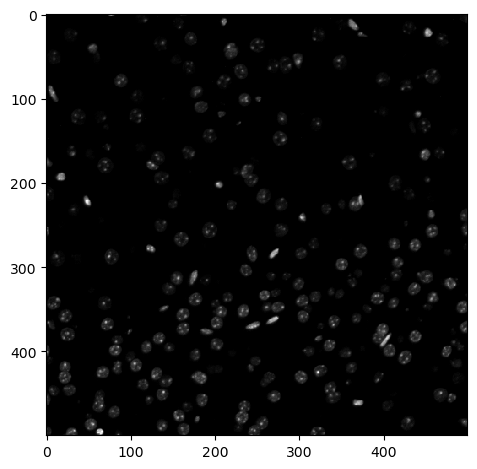

In [7]:
result = zarr_result.compute()

imshow(result)